# Detection OCR
이미지에서 원하는 영역만 추출하여 OCR을 수행하거나 OCR결과에서 원하는 값을 찾는 방법에 대해 정리합니다.

## Install the necessary packages

In [ ]:
!sudo apt install tesseract-ocr
!sudo apt-get install tesseract-ocr-kor
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,829 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!tesseract --list-langs

List of available languages (3):
eng
kor
osd


영어 PDF 파일

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving text_eng.pdf to text_eng.pdf


In [ ]:
!ls

sample_data  text_eng.pdf


### Import Packages

In [ ]:
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import matplotlib.pyplot as plt
import pytesseract
import imutils
import cv2
import re
import requests
import numpy as np

In [4]:
!pip install pdf2image -q

In [5]:
# poppler-utils는 PDF 문서를 처리하기 위한 유용한 도구 모음
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 1s (363 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [6]:
#  코랩 환경에서의 poppler 위치를 명시적으로 설정. 이렇게 하면 pdf2image가 poppler를 사용하여 PDF 파일의 페이지 수를 가져올 수 있다.
import os
os.environ["PATH"] += os.pathsep + "/usr/bin"

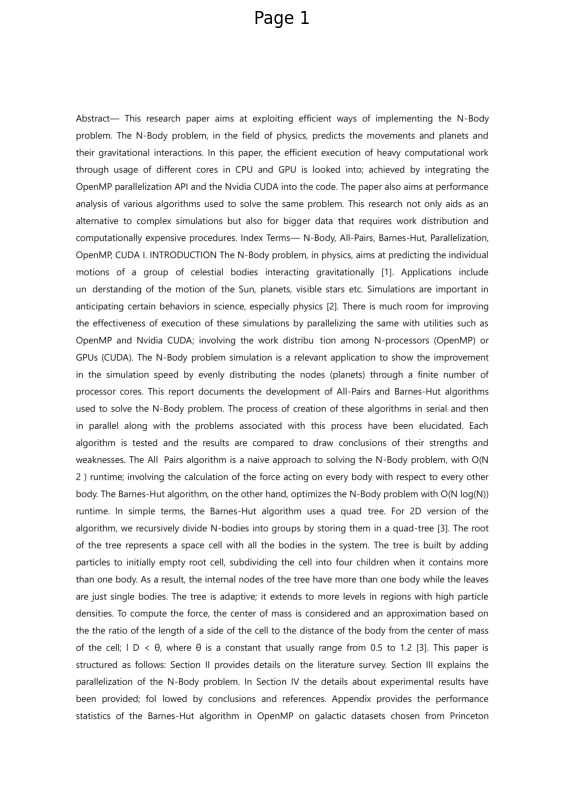

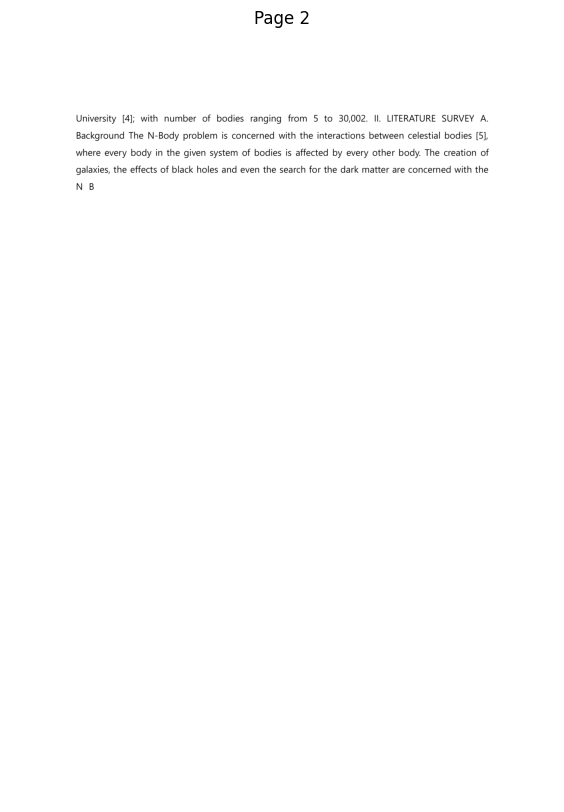

In [ ]:
from pdf2image import convert_from_path
import os

# PDF 파일 경로 설정
pdf_path = '/content/text_eng.pdf'
# PDF를 이미지로 변환 (이 예에서는 DPI를 300으로 설정)
images = convert_from_path(pdf_path, dpi=300)

# 변환된 이미지를 화면에 출력
for i, image in enumerate(images):
    plt.figure(figsize=(16, 10))  # 이미지 크기 조절
    plt.imshow(image)
    plt.axis('off')  # 축 숨기기
    plt.title(f'Page {i+1}')
    plt.show()

In [ ]:
import cv2
import pytesseract
from pdf2image import convert_from_path
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
import numpy as np

# PDF 파일을 이미지로 변환
pages = convert_from_path('/content/text_eng.pdf')

# 텍스트를 저장할 변수 초기화
text = ""

# 이미지를 그레이스케일로 변환하고 텍스트 추출
for idx, page in enumerate(pages):
    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(np.array(page), cv2.COLOR_RGB2GRAY)

    # 이미지를 파일로 저장하여 pytesseract로 텍스트 추출
    filename = "{}.jpg".format(idx)
    cv2.imwrite(filename, gray)
    text += pytesseract.image_to_string(Image.open(filename), lang='eng')
    os.remove(filename)

# 추출된 텍스트 출력
print(text)


Abstract— This research paper aims at exploiting efficient ways of implementing the N-Body
problem. The N-Body problem, in the field of physics, predicts the movements and planets and
their gravitational interactions. In this paper, the efficient execution of heavy computational work
through usage of different cores in CPU and GPU is looked into; achieved by integrating the
OpenMP parallelization API and the Nvidia CUDA into the code. The paper also aims at performance
analysis of various algorithms used to solve the same problem. This research not only aids as an
alternative to complex simulations but also for bigger data that requires work distribution and
computationally expensive procedures. Index Terms— N-Body, All-Pairs, Barnes-Hut, Parallelization,
OpenMP CUDA I. INTRODUCTION The N-Body problem, in physics, aims at predicting the individual
motions of a group of celestial bodies interacting gravitationally [1]. Applications include
un derstanding of the motion of the Sun, planet

한국어 pdf ocr 변환

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving text_ko.pdf to text_ko.pdf


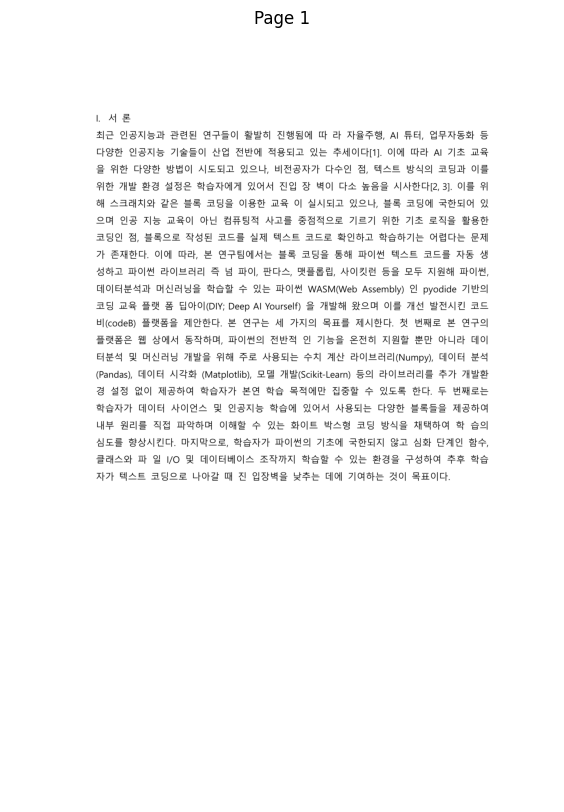

In [ ]:
from pdf2image import convert_from_path
import os

# PDF 파일 경로 설정
pdf_path = '/content/text_ko.pdf'
# PDF를 이미지로 변환 (이 예에서는 DPI를 300으로 설정)
images = convert_from_path(pdf_path, dpi=300)

# 변환된 이미지를 화면에 출력
for i, image in enumerate(images):
    plt.figure(figsize=(16, 10))  # 이미지 크기 조절
    plt.imshow(image)
    plt.axis('off')  # 축 숨기기
    plt.title(f'Page {i+1}')
    plt.show()

In [ ]:
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
from PIL import ImageEnhance, ImageFilter
import re

images = convert_from_path('/content/text_ko.pdf', dpi=300)

# 변환된 이미지로부터 텍스트 추출 및 전처리
all_text = ''
for image in images:
    # 이미지 전처리: 그레이스케일로 변환, 대비 조정, 노이즈 제거
    image = image.convert('L')  # 그레이스케일로 변환
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(2)  # 대비를 2배로 조정
    image = image.filter(ImageFilter.MedianFilter(size=3))  # 노이즈 제거

    # pytesseract를 사용하여 이미지에서 텍스트 추출
    text = pytesseract.image_to_string(image, lang='eng+kor')

    all_text += text

# 추출된 텍스트 출력 (또는 다른 처리를 위해 사용)
print(all_text)



이 활발히 진 행 됨 에 따 라 자 율 주행, 시 튜터, 업 무 자동화

= 드

CL = =
다양한 인 공 지능 기 술 들 이 산업 전 반 에 적 용 되고 있는 추 세 이 다 [1]. 이에 따라 시 기초 교육
르

을 위한 다양한 방 법 이 시 도 되 고 있으나, 비 전 공 자 가 다 수 인 점, 텍스트 방 식 의 코 딩 과 이를
위한 개발 환경 설 정 은 학 습 자 에게 있어서 진입 장 벽 이 다소 높 음 을 시 사 한 다 [2, 3]. 이를 위
해 스 크 래 치 와 같은 블록 코 딩 을 이용한 교육 이 실 시 되고 있으나, 블록 코 딩 에 국 한 되어 A
으며 인공 지능 교 육 이 아닌 컴 퓨 팅 적 사 고 를 중 점 적 으로 기르기 위한 기초 로 직 을 활 용 한
코 딩 인 점, 블 록 으로 작성된 z

rhe
reo
ae

가 존 재 한 다. 이에 따라,
성 하 고 me 라이브러리 즉 3 파이, ate HSS

“1 WASM(Web Assembly) 인 6/00106 기 반 의
코딩 교육; 플랫 폼 5 팁 아 이 (1 0660 41 1041『5611) 을 개발해 왔으며 이를 개선 발 전 시킨 코드
비 (60060) 플 랫 폼 을 제 안 한 다. 본 연 구 는 세 가 지 의 목 표 를 제 시 한다. 첫 번 째 로 본 연 구 의
플 랫 폼 은 웹 상에서 동 작 하며, 파 이 썬 의 전반적 인 기 능 을 온전히 지원할 뿐만 아니라 데이
터 분석 및 머 신 러닝 개 발 을 위해 주로 사 용 되 는 수치 계산 라 이 브 러 리 (44000), 데이터 분석
(030089), 데이터 시각화 (/4【0101106), 모델 개 발 (6011『 ㄴ Ｌ ㄴ 68010) 등 의 라 이 브 러 리 를 추가 개 발 환
경 설정 없이 제 공 하 여 학 습 자 가 본연 학습 목 적 에만 집중할 수 있도록 한다. 두 번 째 로 는
학 습 자 가 데이터 사이언스 및 인 공 지능 학 습 에 있어서 사 용 되 는 다양한 블 록 들을 제 공 하 여

@ |

a
0 뜨
> 09

내부 원

## 네이버 클라우드 플랫폼 OCR 서비스

https://www.ncloud.com/

https://guide.ncloud-docs.com/docs/clovaocr-overview

- 네이버 클라우드 플랫폼 콘솔에 접속해 주십시오.
- Region 메뉴에서 이용 중인 리전을 클릭하여 선택해 주십시오.
- Platform 메뉴에서 VPC와 Classic 가운데 클릭하여 선택해 주십시오.
- Services > AI Services > CLOVA OCR 메뉴를 차례대로 클릭해 주십시오.
- Subscription 메뉴를 클릭해 주십시오.
- [이용 신청] 버튼을 클릭해 주십시오.
- 서비스 이용신청 팝업 창이 나타나면 CLOVA OCR 서비스 이용약관을 읽고 동의합니다. 를 클릭해 주십시오.
- [상품 이용 신청] 버튼을 클릭해 주십시오.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving text_ko_ocr.xls to text_ko_ocr.xls


In [2]:
import pandas as pd

file_path = '/content/text_ko_ocr.xls'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 데이터 프레임의 내용을 행별로 출력
for index, row in df.iterrows():
    # 각 셀의 데이터를 탭으로 구분하여 출력
    print('\t'.join([str(x) for x in row]))


최근 인공지능과 관련된 연구들이 활발히 진행됨에 따라 자율주행, Al 튜터, 업무자동화 등 
다양한 인공지능 기술들이 산업 전반에 적용되고 있는 추세이다[1]. 이에 따라 Al 기초 교육 
을 위한 다양한 방법이 시도되고 있으나, 비전공자가 다수인 점, 텍스트 방식의 코딩과 이를 
위한 개발 환경 설정은 학습자에게 있어서 진입 장 벽이 다소 높음을 시사한다[2,3]. 이를 위 
해 스크래치와 같은 블록 코딩을 이용한 교육 이 실시되고 있으나, 블록 코딩에 국한되어 있 
으며 인공 지능 교육이 아닌 컴퓨팅적 사고를 중점적으로 기르기 위한 기초 로직을 활용한 
코딩인 점, 블록으로 작성된 코드를 실제 텍스트 코드로 확인하고 학습하기는 어렵다는 문제 
가 존재한다. 이에 따라, 본 연구팀에서는 블록 코딩을 통해 파이썬 텍스트 코드를 자동 생 
성하고 파이썬 라이브러리 즉 넘 파이, 판다스, 맷플롭립, 사이킷런 등을 모두 지원해 파이썬, 
데이터분석과 머신러닝을 학습할 수 있는 파이썬 WASM(Web Assembly) 인 pyodide 기반의 
코딩 교육 플랫 폼 딥아이(DIY; Deep Al Yourself) 을 개발해 왔으며 이를 개선 발전시킨 코드 
비(codeB) 플랫폼을 제안한다. 본 연구는 세 가지의 목표를 제시한다. 첫 번째로 본 연구의 
플랫폼은 웹 상에서 동작하며, 파이썬의 전반적 인 기능을 온전히 지원할 뿐만 아니라 데이 
터분석 및 머신러닝 개발을 위해 주로 사용되는 수치 계산 라이브러리(Numpy), 데이터 분석 
(Pandas), 데이터 시각화 (Matplotlib), 모델 개발(Scikit-Learn) 등의 라이브러리를 추가 개발환 
경 설정 없이 제공하여 학습자가 본연 학습 목적에만 집중할 수 있도록 한다. 두 번째로는 
학습자가 데이터 사이언스 및 인공지능 학습에 있어서 사용되는 다양한 블록들을 제공하여 
내부 원리를 직접 파악하며 이해할 수 있는 화이트 박스형 코딩 방식을 채택하여 학 습의 
심도를 향상시킨다. 마지막으로, 학습자가 파이

Q. 한글이 포함된 pdf 파일을 생성하여 naver clova ocr로 텍스트 변환을 수행한 결과를 출력하세요.

In [3]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

Saving textwithtable_ko.pdf to textwithtable_ko.pdf


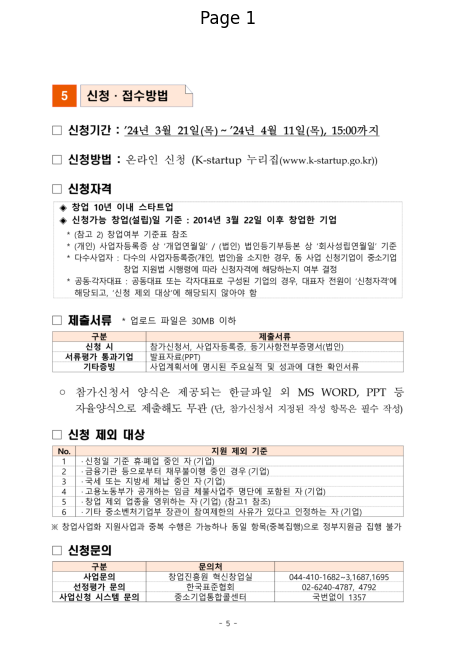

In [7]:
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import os

# PDF 파일 경로 설정
pdf_path = '/content/textwithtable_ko.pdf'
# PDF를 이미지로 변환 (이 예에서는 DPI를 200으로 설정)
images = convert_from_path(pdf_path, dpi=500)

# 변환된 이미지를 화면에 출력
for i, image in enumerate(images):
    plt.figure(figsize=(12, 8))  # 이미지 크기 조절
    plt.imshow(image)
    plt.axis('off')  # 축 숨기기
    plt.title(f'Page {i+1}')
    plt.show()

In [8]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

Saving textwithtable_ko_ocr.xls to textwithtable_ko_ocr.xls


In [9]:
import pandas as pd

file_path = '/content/textwithtable_ko_ocr.xls'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 데이터 프레임의 내용을 행별로 출력
for index, row in df.iterrows():
    # 각 셀의 데이터를 탭으로 구분하여 출력
    print('\t'.join([str(x) for x in row]))


신청기간: '24년 3월 21일(목) ~ '24년 4월 11일(목), 15:00까지 
신청방법: 온라인 신청 (K-startup 누리집(www.k-startup.go.kr)) 
신청자격 
창업 10년 이내 스타트업 
신청가능 창업(설립)일 기준 : 2014년 3월 22일 이후 창업한 기업 
* (참고 2) 창업여부 기준표 참조 
* (개인) 사업자등록증 상 '개업연월일' / (법인) 법인등기부등본 상 '회사성립연월일' 기준 
* 다수사업자 : 다수의 사업자등록증(개인, 법인)을 소지한 경우, 동 사업 신청기업이 중소기업 
창업 지원법 시행령에 따라 신청자격에 해당하는지 여부 결정 
* 공동·각자대표 : 공동대표 또는 각자대표로 구성된 기업의 경우, 대표자 전원이 '신청자격'에 
해당되고, '신청 제외 대상'에 해당되지 않아야 함 
제출서류 * 업로드 파일은 30MB 이하 
구분 제출서류 
신청 시 참가신청서, 사업자등록증, 등기사항전부증명서(법인) 
서류평가 통과기업 발표자료(PPT) 
기타증빙 사업계획서에 명시된 주요실적 및 성과에 대한 확인서류 
○ 참가신청서 양식은 제공되는 한글파일 외 MS WORD, PPT 등 
자율양식으로 제출해도 무관 (단, 참가신청서 지정된 작성 항목은 필수 작성) 
신청 제외 대상 
No. 지원 제외 기준 
1 ·신청일 기준 휴·폐업 중인 자(기업) 
2 금융기관 등으로부터 채무불이행 중인 경우(기업) 
3 · 국세 또는 지방세 체납 중인 자(기업) 
4 고용노동부가 공개하는 임금 체불사업주 명단에 포함된 자 (기업) 
5 · 창업 제외 업종을 영위하는 자(기업) (참고1 참조) 
6 · 기타 중소벤처기업부 장관이 참여제한의 사유가 있다고 인정하는 자(기업) 
창업사업화 지원사업과 중복 수행은 가능하나 동일 항목(중복집행)으로 정부지원금 집행 불가 
신청문의 
구분 문의처 
사업문의 창업진흥원 혁신창업실 044-410-1682~3,1687,1695 
선정평가 문의 한국표준협회 02-6240-4787,792 
사업신청 시스템 문의

In [10]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

Saving textwithtable_ko.png to textwithtable_ko.png


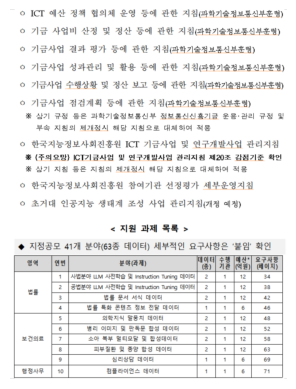

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_path = '/content/textwithtable_ko.png'  # 업로드한 이미지 파일명으로 변경하세요.

# 이미지 열기
img = Image.open(image_path)

# 이미지 시각화
plt.imshow(img)
plt.axis('off')  # 축을 숨깁니다.
plt.show()


In [12]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

Saving textwithtablepng_ko_ocr.xls to textwithtablepng_ko_ocr.xls


In [13]:
import pandas as pd

file_path = '/content/textwithtablepng_ko_ocr.xls'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 데이터 프레임의 내용을 행별로 출력
for index, row in df.iterrows():
    # 각 셀의 데이터를 탭으로 구분하여 출력
    print('\t'.join([str(x) for x in row]))

O 기금 사업비 산정 및 정산 등에 관한 지침(과학기술정보통신부훈령) 
o 기금사업 결과 평가 등에 관한 지침(과학기술정보통신부훈령) 
0 기금사업 성과관리 및 활용 등에 관한 지침(과학기술정보통신부훈령) 
o 기금사업 수행상황 및 정산 보고 등에 관한 지침(과학기술정보통신부훈령) 
O 기금사업 점검계획 등에 관한 지침(과학기술정보통신부훈령) 
상기 규정 등은 과학기술정보통신부 정보통신신흥기금 운용·관리 규정 및 
부속 지침의 제개정시 해당 지침으로 대체하여 적몽 
O 한국지능정보사회진흥원 ICT 기금사업 및 연구개발사업 관리지침 
(주의요망) ICT기금사업 및 연구개발사업 관리지침 제20조 감점기준 확인 
상기 지침 등은 지침의 제개정시 해당 지침으로 대체하여 적용 
O 한국지능정보사회진흥원 참여기관 선정평가 세부운영지침 
O 초거대 인공지능 생태계 조성 사업 관리지침(개정 예정) 
< 지원 과제 목록 > 
지정공모41개분야(63종 데이터) 세부적인 요구사항은 '붙임' 확인 
영역 연번 분야(과제) 데이터 수행 예산* 요구사항 
(종) 기관 (억원) (페이지) 
1 사법분야 LLM 사전학습 및 Instruction Tuning 데이터 2 1 12 34 
2 공법분야 LLM 사전학습 및 Instruction Tuning 데이터 2 1 12 38 
법률 
3 법률 문서 서식 데이터 2 1 12 42 
4 법률 특화 콘텐츠 정보 전달 데이터 1 1 6 46 
5 의학지식 말뭉치 데이터 2 1 12 48 
6 병리 이미지 및 판독문 합성 데이터 2 1 12 52 
보건의료 7 소아 복부 멀티모달 및 합성데이터 2 1 12 58 
8 피부질환 및 종양 합성 데이터 2 1 12 63 
9 심리상담 데이터 1 1 6 69 
행정사무 10 컴플라이언스 데이터 1 1 6 71 
